In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from wordcloud import WordCloud
from datetime import date
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("E:\Projects folder\census\walmart_project\\project.csv", header = None)
print("Number of Observations in adult dataset:", data.shape)
data.head()

Number of Observations in adult dataset: (199523, 42)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [3]:
data.columns = ['age', 'class',
               'industry_code','occupation_code','education', 
                'wage_hour', 'enrolled_edu_inst_last_wk', 'marital_status' ,'industry_code1', 'occupation_code1', 
                'mace' ,'hispanic', 'sex' ,'member_labor_union', 'reason_unemployment' ,
                'employment_type' ,'capital_gains' ,'capital_losses' ,
                'divdend_stocks', 'tax_status' ,'region_previous_residence','state_previous_residence' ,
                'household_family_stat' ,'summary_household' ,'migration_code_change_msa', 'migration_code_change_reg ',
                'migration code-move within reg' ,'stay_same_house_1 ','migration_prev_res_sunbelt', 
                'num_persons_worked_employer', 'family_below_18','country_birth_father','country_birth_mother' ,
                'country_birth_self' ,'citizenship ','business_type','taxable_inc_amount', 'veterans_questionnaire' ,
                'veterans_benefits' ,'weeks_year' ,'instance_weight', 'income'  ]

In [4]:
data.head(5)

,age,class,industry_code,occupation_code,education,wage_hour,enrolled_edu_inst_last_wk,marital_status,industry_code1,occupation_code1,...,country_birth_mother,country_birth_self,citizenship,business_type,taxable_inc_amount,veterans_questionnaire,veterans_benefits,weeks_year,instance_weight,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                               199523 non-null int64
class                             199523 non-null object
industry_code                     199523 non-null int64
occupation_code                   199523 non-null int64
education                         199523 non-null object
wage_hour                         199523 non-null int64
enrolled_edu_inst_last_wk         199523 non-null object
marital_status                    199523 non-null object
industry_code1                    199523 non-null object
occupation_code1                  199523 non-null object
mace                              199523 non-null object
hispanic                          199523 non-null object
sex                               199523 non-null object
member_labor_union                199523 non-null object
reason_unemployment               199523 non-null object
employment_type                   1995

In [6]:
data.describe()

,age,industry_code,occupation_code,wage_hour,capital_gains,capital_losses,divdend_stocks,migration_code_change_msa,family_below_18,taxable_inc_amount,veterans_benefits,weeks_year,instance_weight
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


<a id = 'EDA'></a>
## Data Exploration and Visualization

In [7]:
#Separate categorical and numberical columns
cat_col = data.dtypes[data.dtypes == 'object']
num_col = data.dtypes[data.dtypes != 'object']

In [8]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= data[col].value_counts()
    percent = data[col].value_counts() / data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')
    
#State_Previous_Residence, Migration_Code_Change_Reg, Migration Code-Move Within Reg
#Stay_Same_House_1, Num_Persons_Worked_Employer, Num_Persons_Worked_Employer, Country_Birth_Mother, Country_Birth_Self
# Citizenship

#has unknown values represented by ?

#Education

#9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
#Create Elementary object for 1st-4th, 5th-6th, 7th-8th

#Marital Status

#Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
#Divorced, separated again comes under category separated.

#Workclass

#Self-emp-not-inc, Self-emp-inc comes under category self employed
#Local-gov,State-gov,Federal-gov comes under category goverment emloyees
  

--------------------Class-------------------------
                                  total   percent
 Not in universe                 100245  0.502423
 Private                          72028  0.361001
 Self-employed-not incorporated    8445  0.042326
 Local government                  7784  0.039013
 State government                  4227  0.021186
 Self-employed-incorporated        3265  0.016364
 Federal government                2925  0.014660
 Never worked                       439  0.002200
 Without pay                        165  0.000827


--------------------Education-------------------------
                                         total   percent
 High school graduate                    48407  0.242614
 Children                                47422  0.237677
 Some college but no degree              27820  0.139433
 Bachelors degree(BA AB BS)              19865  0.099562
 7th and 8th grade                        8007  0.040131
 10th grade                               7557  0.

                                    total   percent
 Not in universe under 1 year old  101212  0.507270
 Yes                                82538  0.413677
 No                                 15773  0.079054


--------------------Num_Persons_Worked_Employer-------------------------
                  total   percent
 ?                99696  0.499672
 Not in universe  84054  0.421275
 No                9987  0.050054
 Yes               5786  0.028999


--------------------Country_Birth_Father-------------------------
                          total   percent
 Not in universe         144232  0.722884
 Both parents present     38983  0.195381
 Mother only present      12772  0.064013
 Father only present       1883  0.009438
 Neither parent present    1653  0.008285


--------------------Country_Birth_Mother-------------------------
                                total   percent
 United-States                 159163  0.797718
 Mexico                         10008  0.050160
 ?             

In [63]:
edit_cols = ['state_previous_residence','migration code-move within reg' , 
             'stay_same_house_1 ', 'num_persons_worked_employer', 'country_birth_mother', 
             'country_birth_self', 'country_birth_self']
# Replace ? with Unknown
for col in edit_cols:
    data.loc[data[col] == '?', col] = 'unknown'

In [64]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {data[(data[col] == '?')].any().sum()}")

? in state_previous_residence: 0
? in migration code-move within reg: 0
? in stay_same_house_1 : 0
? in num_persons_worked_employer: 0
? in country_birth_mother: 0
? in country_birth_self: 0
? in country_birth_self: 0


In [16]:
hs_grad = [' High school graduate',' 11th grade',' 10th grade',' 9th grade',' 12th grade no diploma']
elementary = [' 1st 2nd 3rd or 4th grade',' Less than 1st grade',' 7th and 8th grade',' 5th or 6th grade']

#replace elements in list.
data['education'].replace(hs_grad,' HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = ' elementary_school',inplace = True)

data['education'].value_counts()

HS-grad                                    71196
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
elementary_school                          13902
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
Name: education, dtype: int64

In [ ]:
data.head(20)

In [17]:
married= [' Married-civilian spouse present',' Married-spouse absent',' Married-A F spouse present']
separated = [' Separated',' Divorced',' Widowed']

#replace elements in list.
data['marital_status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital_status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital_status'].value_counts()

 Never married    86485
Married           86405
Separated         26633
Name: marital_status, dtype: int64

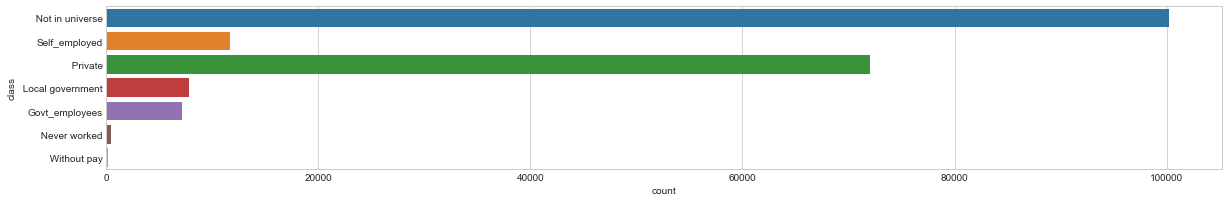

In [55]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="class", data=data);

In [56]:
self_employed = [' Self-employed-not incorporated',' Self-employed-incorporated']
govt_employees = [' Federal government',' State government',' Federal government']

#replace elements in list.
data['class'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['class'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['class'].value_counts()

 Not in universe     100245
 Private              72028
Self_employed         11710
 Local government      7784
Govt_employees         7152
 Never worked           439
 Without pay            165
Name: class, dtype: int64

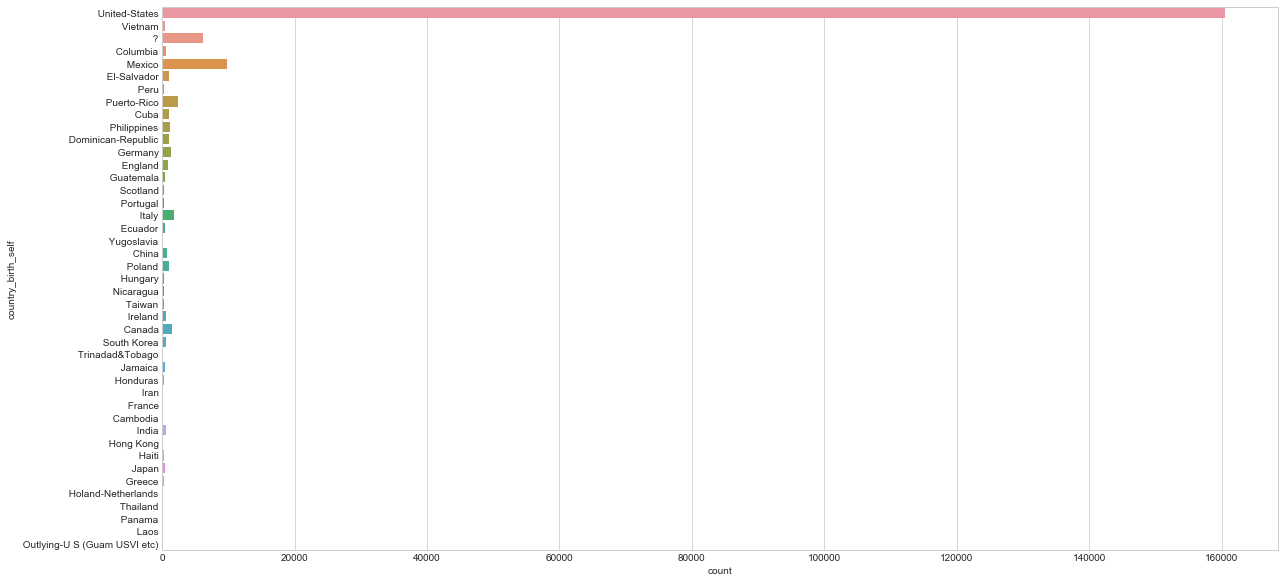

In [61]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_self", data=data);

In [65]:
US = [' United-States']
Outside_US = [ ?
 Cambodia
 Canada
 China
 Columbia
 Cuba
 Dominican-Republic
 Ecuador
 El-Salvador
 England
 France
 Germany
 Greece
 Guatemala
 Haiti
 Holand-Netherlands
 Honduras
 Hong Kong
 Hungary
 India
 Iran
 Ireland
 Italy
 Jamaica
 Japan
 Laos
 Mexico
 Nicaragua
 Outlying-U S (Guam USVI etc)
 Panama
 Peru
 Philippines
 Poland
 Portugal
 Puerto-Rico
 Scotland
 South Korea
 Taiwan
 Thailand
 Trinadad&Tobago
 Vietnam
 Yugoslavia





























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































 ?
 Cambodia
 Canada
 China
 Columbia
 Cuba
 Dominican-Republic
 Ecuador
 El-Salvador
 England
 France
 Germany
 Greece
 Guatemala
 Haiti
 Holand-Netherlands
 Honduras
 Hong Kong
 Hungary
 India
 Iran
 Ireland
 Italy
 Jamaica
 Japan
 Laos
 Mexico
 Nicaragua
 Outlying-U S (Guam USVI etc)
 Panama
 Peru
 Philippines
 Poland
 Portugal
 Puerto-Rico
 Scotland
 South Korea
 Taiwan
 Thailand
 Trinadad&Tobago
 Vietnam
 Yugoslavia


























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































 ?
 Cambodia
 Canada
 China
 Columbia
 Cuba
 Dominican-Republic
 Ecuador
 El-Salvador
 England
 France
 Germany
 Greece
 Guatemala
 Haiti
 Holand-Netherlands
 Honduras
 Hong Kong
 Hungary
 India
 Iran
 Ireland
 Italy
 Jamaica
 Japan
 Laos
 Mexico
 Nicaragua
 Outlying-U S (Guam USVI etc)
 Panama
 Peru
 Philippines
 Poland
 Portugal
 Puerto-Rico
 Scotland
 South Korea
 Taiwan
 Thailand
 Trinadad&Tobago
 Vietnam
 Yugoslavia























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































]

#replace elements in list.
#data['class'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
#data['class'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['country_birth_self'].value_counts()

 United-States                   160479
 Mexico                            9781
 ?                                 6119
 Puerto-Rico                       2473
 Italy                             1844
 Canada                            1451
 Germany                           1382
 Philippines                       1231
 Poland                            1110
 Cuba                              1108
 El-Salvador                       1108
 Dominican-Republic                1103
 England                            903
 China                              760
 Columbia                           612
 South Korea                        609
 Ireland                            599
 India                              581
 Vietnam                            473
 Japan                              469
 Jamaica                            453
 Guatemala                          444
 Ecuador                            375
 Peru                               355
 Haiti                              353


In [ ]:
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == 'China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador'                 , 'native-country'] = 'South-America' 
dataset_raw.loc[dataset_raw['native-country'] == 'England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'

dataset_bin['native-country'] = dataset_raw['native-country']

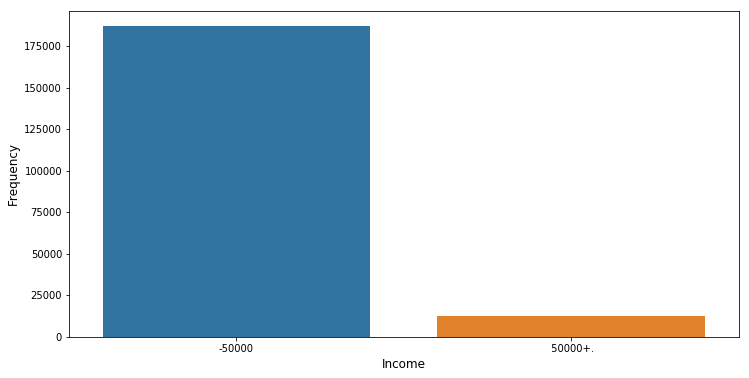

In [20]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

- Our dataset has 187000 people earning <=50K i.e. 94% and remainng 6% earns more than 50K.
- Let's explore distribution of numerical features.

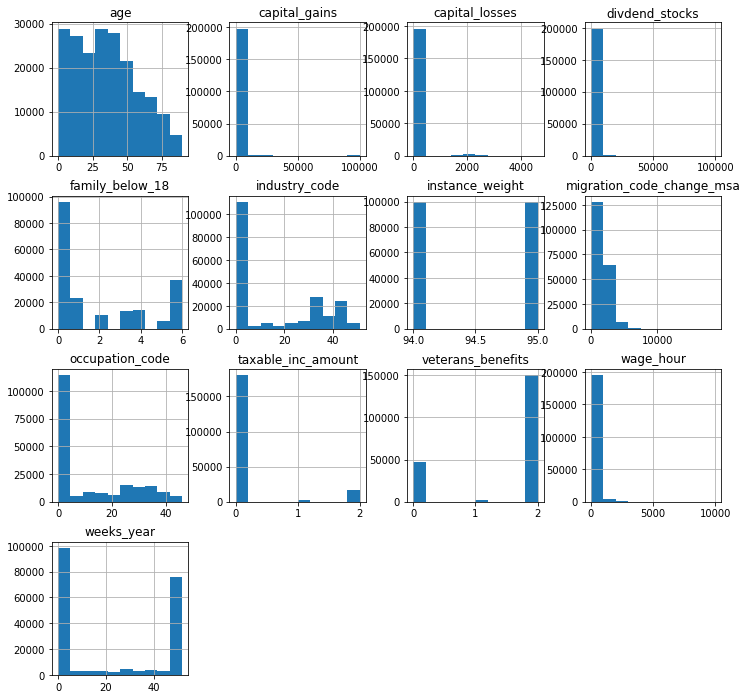

In [21]:
data[list(num_col.index)].hist(figsize = (12,12));

- `age`: In our dataset People from age group of 0 to 90 can be observed.
- Our dataset is highly skewed and should consider scaling it for better performance of our models.

In [37]:
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables

In [43]:
data.loc[data['income'] == '50000+.', 'predclass'] = 1
data.loc[data['income'] == '-50000', 'predclass'] = 0

dataset_bin['income'] = data['income']
dataset_con['income'] = data['income']

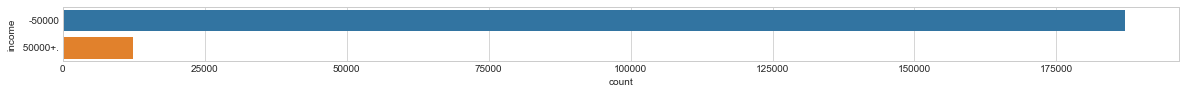

In [46]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y="income", data=dataset_bin);

In [44]:
dataset_bin['age'] = pd.cut(data['age'], 10) # discretised 
dataset_con['age'] = data['age'] # non-discretised

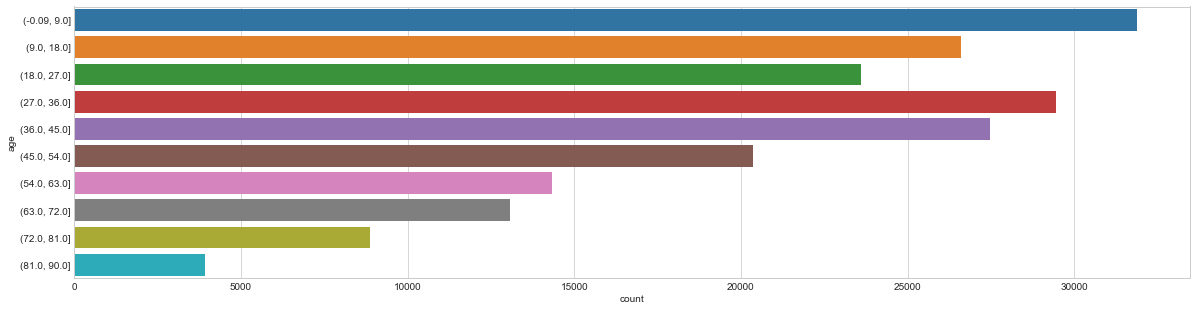

In [54]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="age", data=dataset_bin);


In [ ]:
table_occu = pd.crosstab(adult_df['occupation'], adult_df['income'])
table_workclass = pd.crosstab(adult_df['workclass'], adult_df['income'])
table_edu = pd.crosstab(adult_df['education'], adult_df['income'])
table_marital = pd.crosstab(adult_df['marital.status'], adult_df['income'])
table_race = pd.crosstab(adult_df['race'], adult_df['income'])
table_sex = pd.crosstab(adult_df['sex'], adult_df['income'])
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);




In [ ]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


In [ ]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

In [ ]:
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary
1. Sex:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K 
2. Race:- White and asain-pac-Islander earn salary more than 50K
3. marital_status :- 41% of married people seem to earn salary greater than 50K.
4. People having degree doctorate,prof-school,masters are making salary more than 50K.
5. Out of all the workclass only 59% self employed people are making salary more than 50K.
6. If I check by occupation, Proportion of people making salary less than 50K is higher.

Let's find correlation between numerical fetatures

In [ ]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(adult_df[list(num_col.index)].corr(),annot = True,square = True);

strong correlation.

- Age and Hours per week
- capital gain and hours per week

Moderate Correlation

- capital loss and age

In [ ]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital.gain', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

- Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90
- Age 90 doesn't follow the pattern.
- Capital.gain of 99999 is clearly a outlier let's remove it.

In [ ]:
adult_df[adult_df['age'] == 90].hist(figsize = (17,8));

In [ ]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(adult_df[adult_df['age'] == 90][col].value_counts())
    else:
        continue
   

- At age 90 people can't work in goverment or private sectors 
- Morever it shows the peak working hours as 40.

In [ ]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours.per.week', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours.per.week', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

- Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.
- There are few people working for 99 hours per week but doesn't seem to  make high capital gain. Conversely people working below 40 hours per week are making high capital gains.

In [ ]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('age','hours.per.week', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

`Outliers Summary`

- Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
- Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is again unreasonable.
- Few people working for 99 hours per week.

`Feature Removal`

- Education num and education are giving similar information 
- Relationship and marital status imply similar information.Hence keeping only one of the two.

<a id='algo prepare'></a>

## Preparing Data for ML Algorithms

In [ ]:
print(f"Number of columns before deleting: {adult_df.shape[1]}")

del_cols = ['relationship','education.num']
adult_df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_df.shape[1]}")

In [ ]:
hrs_per_week = adult_df[adult_df['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])


- It won't be a good idea to delete all the outliers because if that's the case with test data too we might get false results. So I am keeping people working for 99 hourse per week. 

In [ ]:
# drop rows with age 90
print("Number of observation before removing:",adult_df.shape)
index_age = adult_df[adult_df['age'] == 90].index
adult_df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

In [ ]:
print("Number of observation before removing:",adult_df.shape)
index_gain = adult_df[adult_df['capital.gain'] == 99999].index
adult_df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

In [ ]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_df[num_col_new]),columns = num_col_new).head(3)

In [ ]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])



In [ ]:
num_df = pipeline.fit_transform(adult_df)
num_df.shape

In [ ]:
# columns which I don't need after creating dummy variables dataframe
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [ ]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_df)
cat_df.shape

[difference](https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas)

In [ ]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [ ]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")


## Train and Fine Tuning on the model

In [ ]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [ ]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()


In [ ]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive']

In [ ]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_extratrees:'Extratrees' ,
          clf_gnb: 'Naive'}

In [ ]:
# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)    

In [ ]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

In [ ]:
models_new = {clf_logreg:'LogisticRegression',        
              clf_forest: 'RandomForest',
              clf_ada: 'Adaboost',
              clf_bagging: 'Bagging'}

classifiers_new = models_new.values()

K-fold cross validation divides data into k folds and uses k-1 folds for training and k folds for testing. Eventually all the data gets used for training and testing.

In [ ]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

In [ ]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

In [ ]:
param_grid_logreg = {'C':[0.0001,0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
param_grid_rf = {'n_estimators' : [50,60],
               'max_depth': range(5,16,2)}
param_grid_ada = {'n_estimators':[50,60,70]}
param_grid_bagging = {'n_estimators':[50,60,70]}


In [ ]:
def feature_selection(model,X_train,y_train):
    rfe_model = RFE(model)
    rfe_model = rfe_model.fit(X_train,y_train)
    X_train_cols = list(X_train.columns[rfe_model.support_])
    X_train_new = X_train[X_train_cols]
    return X_train_new

def grid(model,parameters,X_train_new):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, return_train_score = False,
                        scoring = 'accuracy')
    grid.fit(X_train_new,y_train)
    return grid.best_score_, grid.best_estimator_

def main(model,X_train,y_train,parameters):
    X_train_modi = feature_selection(model,X_train,y_train)
    grid_best_score,grid_best_params = grid(model,parameters,X_train_modi)
    return grid_best_score,grid_best_params,X_train_modi
    

In [ ]:
grid_best_score_logreg, grid_best_params_logreg , X_train_modi_logreg = main(clf_logreg,X_train,y_train,param_grid_logreg)
grid_best_score_rf, grid_best_params_rf , X_train_modi_rf = main(clf_forest,X_train,y_train,param_grid_rf)
grid_best_score_ab, grid_best_params_ab , X_train_modi_ab = main(clf_ada,X_train,y_train,param_grid_ada)
grid_best_score_bc, grid_best_params_bc , X_train_modi_bc = main(clf_ada,X_train,y_train,param_grid_bagging)

In [ ]:
pd.DataFrame([grid_best_score_logreg, grid_best_score_rf,grid_best_score_ab,grid_best_score_bc],
             index = ['LogisticRegression','RandomForest','AdaBoost','Bagging'],
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score',ascending  = False)

In [ ]:
print("Number of estimators:",grid_best_params_ab.get_params()['n_estimators'])

In [ ]:
ab_mod  = grid_best_params_ab
plt.figure(figsize = (22,12))
(pd.Series(ab_mod.feature_importances_, index=X_train.columns).nlargest(30).plot(kind='barh')); 
plt.xlabel('Feature Imporatnaces',fontsize = 15);
plt.xticks(fontsize = 15);

- [Machine Learning Coursera](https://www.coursera.org/learn/machine-learning)
- [Logistic Regression Tuning Parameters](http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.htm)
- [Why Scaling](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)
- [passing variables between function](https://stackoverflow.com/questions/16043797/python-passing-variables-between-functions)
- [Feature Importances](https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names)